In [1]:
from mdagent import MDAgent
import os

In [2]:
descriptive_prompt_6 = "Complete all of the following tasks: 1. Download the PDB file 1LYZ. 2. Tell me how many residues are in the chains and beta sheets. 3. Simulate for 1 ps at 300 K. 4. Compute the RMSD. 5. Compute the radius of gyration over time. 6. Compute the SASA (solvent accessible surface area)."
non_descriptive_prompt_6 = "Simulate 1LYZ for 1 ps at 300 K. Tell me how many residues are in the chains and beta sheets, and compute the RMSD, SASA, and radius of gyration of the simulation."

In [3]:
llm_model = "claude-3-5-sonnet-20241022"
tools = "all"

In [4]:
#todays date and time
import datetime
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
print("date:",date)
time = now.strftime("%H:%M:%S")
print("time:",time)

date: 2025-01-14
time: 14:25:45


# descriptive prompt

In [5]:
agent_1 = MDAgent(agent_type="Structured", model=llm_model, top_k_tools=tools)

In [6]:
agent_1.run(descriptive_prompt_6)

Thought: I'll help solve these tasks step by step. Let's start by downloading the PDB file 1LYZ.

Action:
```
{
    "action": "PDBFileDownloader",
    "action_input": "1LYZ"
}
```

PDB file found with this ID: 1LYZ
Thought: Now that I have the PDB file, I'll analyze the structure to get information about residues and beta sheets.

Action:
```
{
    "action": "GetTurnsBetaSheetsHelices",
    "action_input": {
        "query": "1LYZ",
        "primary_accession": "P00698"
    }
}
```

Thought: Let me continue with the analysis. Now I'll set up and run the simulation for 1 ps at 300 K.

Action:
```
{
    "action": "SetUpandRunFunction",
    "action_input": {
        "pdb_id": "1LYZ_142548",
        "forcefield_files": ["amber14-all.xml", "amber14/tip3p.xml"],
        "save": true,
        "system_params": {
            "nonbondedMethod": "PME",
            "nonbondedCutoff": "1.0 * nanometers",
            "constraints": "HBonds",
            "rigidWater": true,
            "constraintTol

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

<Figure size 640x480 with 0 Axes>


    "action_input": "1LY

Z"
}
```



PDB file found with this ID: 1LYZ


Thought: Now

 that we have the PDB file, let's

 analyze its structure to get information about resi

dues and beta sheets.

Action:
```


{
    "

action": "GetTurnsBetaShe

etsHelices",
    "action_input

": {
        "query": "1LY

Z",
        "primary_acc

ession": "P00698"
    }


}
```



Thought: Let's continue

 with setting up and running the simulation

 for 1 ps at

 300 K. We'll use the Set

UpandRunFunction tool with

 appropriate parameters.

Action

:
```
{
    

"action": "SetUpan

dRunFunction",
    "action

_input": {
        "

pdb_id": "1L

YZ_161345",
        "forc

efield_files": ["amber

14-all.xml

", "amber14/tip

3pfb.xml"],


        "system_params

": {
            "non

bondedMethod": "PME",
            "

nonbondedCutoff": "

1.0 * nanometers",


            "constraints": "HBonds",


            "rigidW

ater": true,
            "constra

intTolerance": 0

.000001,
            "

ewaldErrorTolerance

": 0.0

005,
            "solv

ate": true
        },
        "

integrator_params": {


            "integrator_type": "L

angevinMiddle",
            "Temperature

": "300 * kelvin",
            "

Friction": "1.0 / picoseconds

",
            "Timestep": "0

.002 * picoseconds"


        },
        "simulation_params":

 {
            "Ensemble": "NP

T",
            "Number of

 Steps": 500,
            "recor

d_interval_steps": 5

,
            "record_params

": ["step", "pot

entialEnergy", "temperature

", "density"]
        }


    }
}
```

Building system...


About to create system...
Attempts at creating system: 0/3
Error adding solvent ValueError – No template found for residue 1 (LYS).  The set of atoms is similar to HID, but it is missing 8 atoms.  For more information, see https://github.com/openmm/openmm/wiki/Frequently-Asked-Questions#template
Residue code: LYS
Residue code not in solvent list. Adding forcefield                         not supported.


Thought: I see the issue.

 We need to clean the PDB file first

 to handle any non-standard residues before

 running the simulation. Let's

 use the CleaningTool

Function first.

Action:
```


{
    "action": "Clean

ingToolFunction",
    "action_input

": {
        "pdb_id":

 "1LYZ_161345",


        "replace_nonstandard_residues

": true,
        "ad

d_missing_atoms": true,
        

"remove_heterogens":

 true,
        "remove_

water": true,
        "ad

d_hydrogens": true,
        "ad

d_hydrogens_ph": 7.0


    }
}
```



file path: /gpfs/fs2/scratch/qcampbe2/repos/md-agent/ckpt/ckpt_73/pdb/1LYZ_raw_20250110_161345.pdb


Thought

: Now that we have

 a cleaned PDB file,

 let's try running the simulation again with

 the cleaned file.

Action:


```
{
    "action": "

SetUpandRunFunction",
    "action

_input": {
        "pdb_

id": "1LYZ_161400

",
        "forcefield_files": ["

amber14-all.xml", "amber14

/tip3pfb.xml"],
        

"system_params": {
            "non

bondedMethod": "PME",


            "nonbondedCutoff":

 "1.0 * nanometers",


            "constraints": "HBonds",


            "rigidWater": true,


            "constraintTolerance": 

0.000001,
            "ewal

dErrorTolerance":

 0.0005

,
            "solvate": true


        },
        "

integrator_params":

 {
            "integ

rator_type": "

LangevinMid

dle",
            "

Temperature": "300 

* kelvin",
            "Friction":

 "1.0 / picoseconds",


            "Timest

ep": "0.002 * picos

econds"
        },


        "simulation_params": {
            

"Ensemble": "NPT",
            

"Number of Steps": 500,
            

"record_interval_steps": 5,


            "record_

params": ["step",

 "potentialEnergy", "temperature", "

density"]
        }
    }
}


```



Building system...


About to create system...
Attempts at creating system: 0/3


System built successfully
<openmm.openmm.System; proxy of <Swig Object of type 'OpenMM::System *' at 0x2af92cdbd650> >


KeyError: 'Pressure'

In [10]:
registry = agent_1.path_registry
print("ckpt_dir:",os.path.basename(registry.ckpt_dir))
paths_and_descriptions = registry.list_path_names_and_descriptions()
print("\n".join(paths_and_descriptions.split(",")))

ckpt_dir: ckpt_91
Files found in registry: 1LYZ_142548: PDB file downloaded from RSCB
 PDBFile ID: 1LYZ_142548
 1LYZ_142603: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_142608: Initial positions for simulation sim0_142608
 sim0_142608: Basic Simulation of Protein 1LYZ_142603
 rec0_142612: Simulation trajectory for protein 1LYZ_142603 and simulation sim0_142608
 rec1_142612: Simulation state log for protein 1LYZ_142603 and simulation sim0_142608
 rec2_142612: Simulation pdb frames for protein 1LYZ_142603 and simulation sim0_142608
 rmsd_1LYZ: RMSD for 1LYZ
 fig0_143655: RMSD plot for 1LYZ
 rgy_rec0_142612: Radii of gyration per frame for rec0_142612
 fig0_143659: Plot of radii of gyration over time for rec0_142612
 sasa_1LYZ: Total SASA values for 1LYZ
 fig0_143817: Plot of SASA over time for 1LYZ


In [11]:
import re
import os
matches = re.findall(r"rec0_\d+", paths_and_descriptions)
traj_id = matches[0]
traj_path = registry.get_mapped_path(traj_id)
match = re.search(r"top_sim0_\d+", paths_and_descriptions)
top_id = match.group(0)
top_path = registry.get_mapped_path(top_id)
assert os.path.exists(traj_path), "Trajectory file doesn't exist"
assert os.path.exists(top_path), "Topology file doesn't exist"
assert traj_path.endswith(".dcd")
assert top_path.endswith(".pdb")
print(f"It's asserted that file paths for {traj_id} and {top_id} exist")

It's asserted that file paths for rec0_142612 and top_sim0_142608 exist


In [12]:
# this checks DSSP for the first frame, change to the last frame if needed
import mdtraj as md

traj_path = registry.get_mapped_path(traj_id)
top_path = registry.get_mapped_path(top_id)
traj = md.load(traj_path, top=top_path)[0] # first frame

secondary_structure = md.compute_dssp(traj,simplified=True)[0]
print("Number of residues in total: ",traj.n_residues)
print("Number of chains: ",traj.n_chains)
print("Number of residues in sheets: ",len([i for i in secondary_structure if i == 'E']))
print("Number of residues in helices: ",len([i for i in secondary_structure if i == 'H']))
print("Number of residues in coils: ",len([i for i in secondary_structure if i == 'C']))

Number of residues in total:  6921
Number of chains:  3
Number of residues in sheets:  14
Number of residues in helices:  57
Number of residues in coils:  58


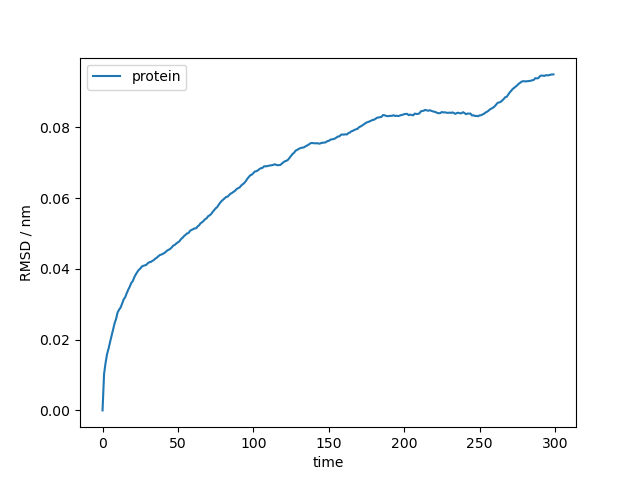

In [13]:
from IPython.display import Image
matches = re.findall(r"fig0_\d+", paths_and_descriptions)
fig_id1 = matches[0]
fig_path1 = registry.get_mapped_path(fig_id1)
assert os.path.exists(fig_path1), f"This figure {fig_id1} does not exist."
Image(filename=fig_path1)

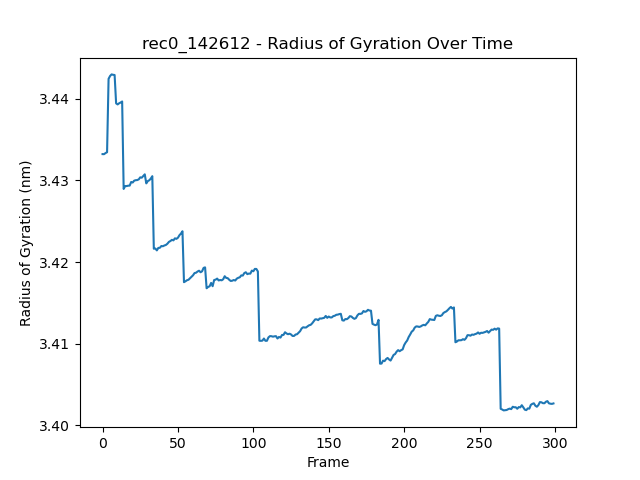

In [14]:
fig_id2 = matches[1]
fig_path2 = registry.get_mapped_path(fig_id2)
assert os.path.exists(fig_path1), f"This figure {fig_id2} does not exist."
Image(filename=fig_path2)

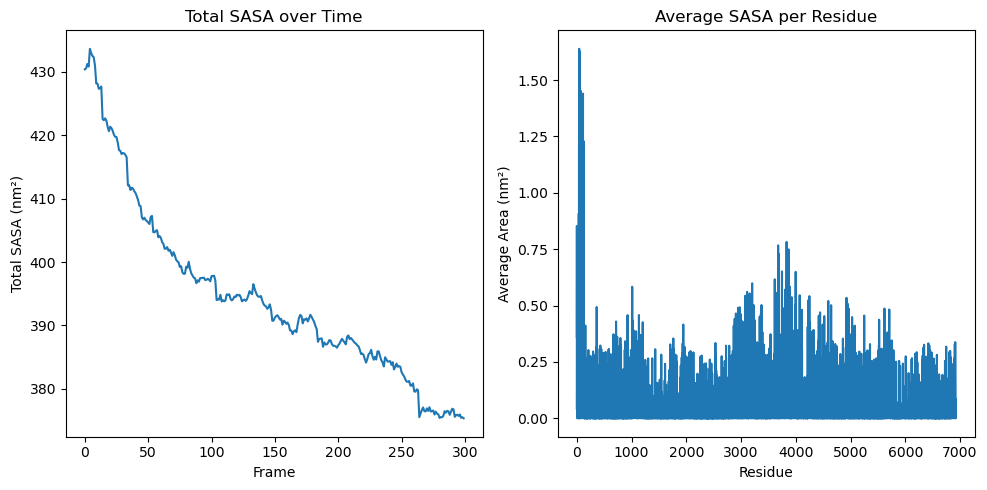

In [15]:
fig_id3 = matches[2]
fig_path3 = registry.get_mapped_path(fig_id3)
assert os.path.exists(fig_path3), f"This figure {fig_id3} does not exist."
Image(filename=fig_path3)

# non-descriptive prompt

In [14]:
agent_2 = MDAgent(agent_type="Structured", model=llm_model, top_k_tools=tools)

In [15]:
agent_2.run(non_descriptive_prompt_6)

Thought: I'll break this down into steps:
1. First, download the PDB file for 1LYZ
2. Set up and run a simulation
3. Analyze the structure and simulation results

Action:
```
{
    "action": "PDBFileDownloader",
    "action_input": "1LYZ"
}
```

PDB file found with this ID: 1LYZ
Thought: Now that I have the PDB file, I'll set up and run a simulation with appropriate parameters for 1 ps at 300 K.

Action:
```
{
    "action": "SetUpandRunFunction",
    "action_input": {
        "pdb_id": "1LYZ_143829",
        "forcefield_files": ["amber14-all.xml", "amber14/tip3pfb.xml"],
        "save": true,
        "system_params": {
            "nonbondedMethod": "PME",
            "nonbondedCutoff": "1.0 * nanometers",
            "constraints": "HBonds",
            "rigidWater": true,
            "ewaldErrorTolerance": 0.0005,
            "constraintTolerance": 0.000001,
            "solvate": true
        },
        "integrator_params": {
            "integrator_type": "LangevinMiddle",
        

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

<Figure size 640x480 with 0 Axes>


```
{
    "action": "P

DBFileDownloader",
    "action_

input": "1LYZ"


}
```



PDB file found with this ID: 1LYZ


Thought: Now

 that I have the PDB file, I

'll set up and run a

 simulation with appropriate parameters for 1 

ps at 300 K.

Action:


```
{
    "action": "

SetUpandRunFunction",
    "action

_input": {
        "pdb

_id": "1LY

Z_161414",
        

"forcefield_files

": ["amber14-all.xml

", "amber14/tip3pf

b.xml"],
        "save

": true,
        "

system_params": {
            "

nonbondedMethod": "PM

E",
            "

nonbondedCutoff": "1

.0 * nanometers",


            "constraints": "H

Bonds",
            "rig

idWater": true,


            "ewaldErrorTolerance

": 0.0005

,
            "constraintTolerance":

 0.000001,
            "

solvate": true


        },
        "integ

rator_params": {
            

"integrator_type": "L

angevinMiddle",
            "Temperature

": "300 * kelvin",
            "

Friction": "1.0 / picos

econds",
            "

Timestep": "0.002 * pic

oseconds"
        },
        "simulation

_params": {
            "

Ensemble": "NPT",
            "

Number of Steps": 500,


            "record_interval_

steps": 5,
            "recor

d_params": ["step", "pot

entialEnergy", "temperature

", "density"]
        }
    

}
}
```



Building system...


About to create system...
Attempts at creating system: 0/3


Error adding solvent ValueError – No template found for residue 1 (LYS).  The set of atoms is similar to HID, but it is missing 8 atoms.  For more information, see https://github.com/openmm/openmm/wiki/Frequently-Asked-Questions#template
Residue code: LYS
Residue code not in solvent list. Adding forcefield                         not supported.


Thought: I see the issue - we need to clean

 and prepare the PDB file first

 to ensure all atoms are present and properly

 formatted before running the simulation.



Action:
```
{
    "

action": "CleaningTool

Function",
    "action_input": {


        "pdb_i

d": "1LYZ_161414",


        "replace_nonstandard_residues

": true,
        "ad

d_missing_atoms": true,
        

"remove_heterogens": true,


        "remove_water": true,


        "add_hydrogens": true

,
        "add_hydro

gens_ph": 7.0


    }
}
```



file path: /gpfs/fs2/scratch/qcampbe2/repos/md-agent/ckpt/ckpt_74/pdb/1LYZ_raw_20250110_161414.pdb


Thought: Now that we have

 a clean PDB file,

 let's try running the simulation again with

 the cleaned structure.

Action:


```
{
    "action": "Set

UpandRunFunction",
    "action_

input": {
        "pdb_i

d": "1LYZ_161425",


        "forcefield_files": ["amber

14-all.xml", "amber14/

tip3pfb.xml"],
        "

save": true,
        "system_params

": {
            "nonbondedMetho

d": "PME",
            "nonb

ondedCutoff": "1.0

 * nanometers",
            "constraints

": "HBonds",
            "rig

idWater": true,
            "ew

aldErrorTolerance": 0.0

005,
            "constraintTolerance

": 0.000001,
            "

solvate": true
        },
        

"integrator_params": {
            "

integrator_type": "Langevin

Middle",
            "Temperature": "300

 * kelvin",
            "Friction

": "1.0 / picoseconds

",
            "Timestep": "0

.002 * picoseconds"
        

},
        "simulation_params": {


            "Ensemble": "NPT",


            "Number of Steps": 500,


            "record_interval_steps": 5

,
            "record_params": ["step

", "potentialEnergy", "temperature",

 "density"]
        }
    }


}
```

Building system...


About to create system...
Attempts at creating system: 0/3


System built successfully
<openmm.openmm.System; proxy of <Swig Object of type 'OpenMM::System *' at 0x2af929f86190> >


KeyError: 'Pressure'

In [2]:
registry = agent_2.path_registry
print("ckpt_dir:",os.path.basename(registry.ckpt_dir))
paths_and_descriptions = registry.list_path_names_and_descriptions()
print("\n".join(paths_and_descriptions.split(",")))

ckpt_dir: ckpt_93
Files found in registry: 1LYZ_143829: PDB file downloaded from RSCB
 PDBFile ID: 1LYZ_143829
 1LYZ_143840: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_143844: Initial positions for simulation sim0_143844
 sim0_143844: Basic Simulation of Protein 1LYZ_143840
 rec0_143848: Simulation trajectory for protein 1LYZ_143840 and simulation sim0_143844
 rec1_143848: Simulation state log for protein 1LYZ_143840 and simulation sim0_143844
 rec2_143848: Simulation pdb frames for protein 1LYZ_143840 and simulation sim0_143844
 rec0_145152: dssp values for trajectory with id: rec0_143848
 rmsd_1LYZ: RMSD for 1LYZ
 fig0_145158: RMSD plot for 1LYZ
 sasa_1LYZ: Total SASA values for 1LYZ
 fig0_145319: Plot of SASA over time for 1LYZ
 rgy_rec0_143848: Radii of gyration per frame for rec0_143848
 fig0_145323: Plot of radii of gyration over time for rec0_14

In [4]:
import re
import os
match = re.search(r"rec0_\d+", paths_and_descriptions)
traj_id = match.group(0)
traj_path = registry.get_mapped_path(traj_id)
match = re.search(r"top_sim0_\d+", paths_and_descriptions)
top_id = match.group(0)
top_path = registry.get_mapped_path(top_id)
assert os.path.exists(traj_path), "Trajectory file doesn't exist"
assert os.path.exists(top_path), "Topology file doesn't exist"
assert traj_path.endswith(".dcd")
assert top_path.endswith(".pdb")
print(f"It's asserted that file paths for {traj_id} and {top_id} exist")

It's asserted that file paths for rec0_143848 and top_sim0_143844 exist


In [5]:
# this checks DSSP for the first frame, change to the last frame if needed
import mdtraj as md

traj_path = registry.get_mapped_path(traj_id)
top_path = registry.get_mapped_path(top_id)
traj = md.load(traj_path, top=top_path)[0] # first frame

secondary_structure = md.compute_dssp(traj,simplified=True)[0]
print("Number of residues in total: ",traj.n_residues)
print("Number of chains: ",traj.n_chains)
print("Number of residues in sheets: ",len([i for i in secondary_structure if i == 'E']))
print("Number of residues in helices: ",len([i for i in secondary_structure if i == 'H']))
print("Number of residues in coils: ",len([i for i in secondary_structure if i == 'C']))

Number of residues in total:  6923
Number of chains:  3
Number of residues in sheets:  14
Number of residues in helices:  54
Number of residues in coils:  61


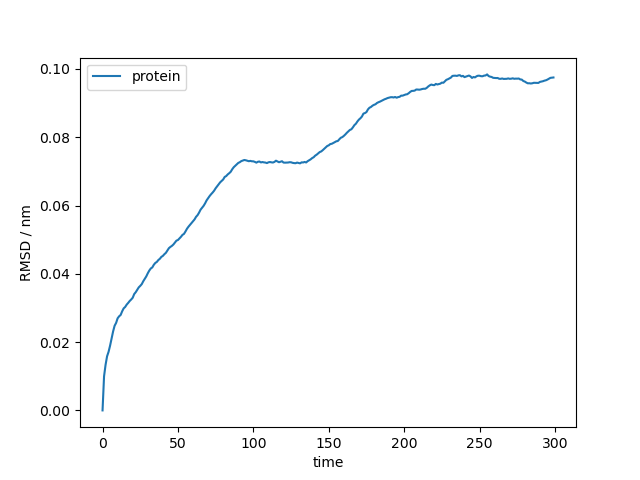

In [6]:
from IPython.display import Image
matches = re.findall(r"fig0_\d+", paths_and_descriptions)
fig_id1 = matches[0]
fig_path1 = registry.get_mapped_path(fig_id1)
assert os.path.exists(fig_path1), f"This figure {fig_id1} does not exist."
Image(filename=fig_path1)

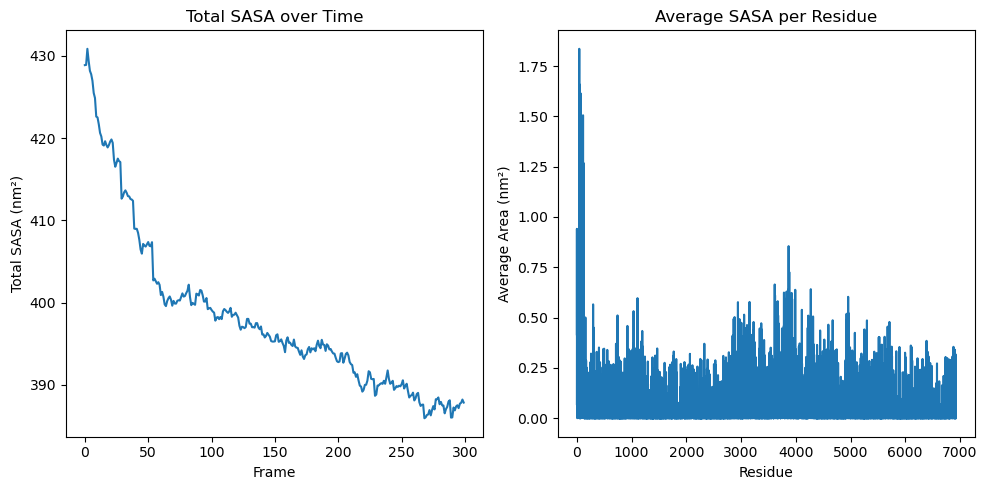

In [7]:
fig_id2 = matches[1]
fig_path2 = registry.get_mapped_path(fig_id2)
assert os.path.exists(fig_path1), f"This figure {fig_id2} does not exist."
Image(filename=fig_path2)

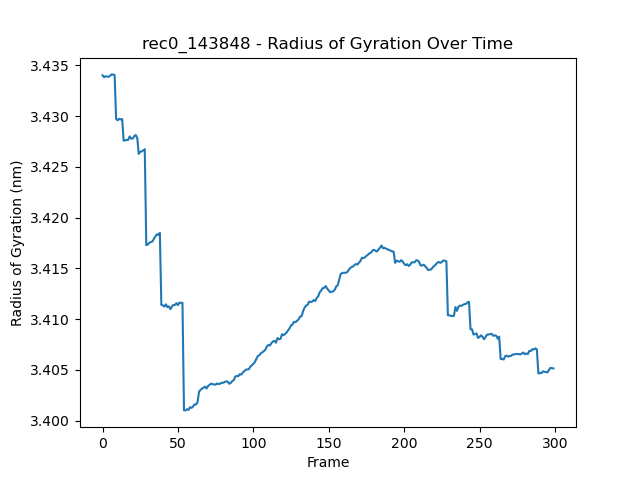

In [8]:
fig_id3 = matches[2]
fig_path3 = registry.get_mapped_path(fig_id3)
assert os.path.exists(fig_path3), f"This figure {fig_id3} does not exist."
Image(filename=fig_path3)